iter 10010: 14.000660
iter 10020: 13.886994
iter 10030: 13.817060
iter 10040: 13.773334
iter 10050: 13.764332
iter 10060: 13.662535
iter 10070: 13.508183
iter 10080: 13.508331
iter 10090: 13.548322
iter 10100: 13.523937
iter 10110: 13.599342
iter 10120: 13.598409
iter 10130: 13.512046
iter 10140: 13.544682
iter 10150: 13.447477
iter 10160: 13.421038
iter 10170: 13.471382
iter 10180: 13.406297
iter 10190: 13.331623
iter 10200: 13.311980
iter 10210: 13.187346
iter 10220: 13.129141
iter 10230: 13.111728
iter 10240: 13.220341
iter 10250: 13.111148
iter 10260: 13.111354
iter 10270: 13.058373
iter 10280: 13.094438
iter 10290: 13.064875
iter 10300: 13.027899
iter 10310: 13.042790
iter 10320: 13.028673
iter 10330: 13.085555
iter 10340: 13.003920
iter 10350: 13.101047
iter 10360: 13.117002
iter 10370: 13.136788
iter 10380: 13.099870
iter 10390: 13.076838
iter 10400: 12.983233
iter 10410: 12.972921
iter 10420: 12.968053
iter 10430: 12.843760
iter 10440: 12.828909
iter 10450: 12.829742
iter 10460

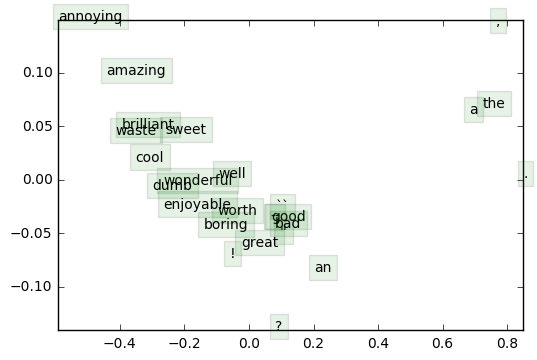

In [1]:
# Acknowledgement
# CS224d: Deep Learning for Natural Language Processing
# Dataset: http://nlp.stanford.edu/sentiment/index.html

import random
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, 'C:\\Users\\user\\Documents\\GitHub\\deep_learning_archieves\\modules')
#sys.path.insert(0, 'C:\\Users\\user\\Documents\\GitHub\\deep_learning_archieves\\datasets')
from cs224d.data_utils import *
from word2vec import *
from sgd import *

# Reset the random seed to make sure that everyone gets the same results
random.seed(314)
dataset = StanfordSentiment()
tokens = dataset.tokens()
nWords = len(tokens)

# We are going to train 10-dimensional vectors for this assignment
dimVectors = 10

# Context size
C = 5

# Reset the random seed to make sure that everyone gets the same results
random.seed(31415)
np.random.seed(9265)
wordVectors = np.concatenate(((np.random.rand(nWords, dimVectors) - .5) / \
	dimVectors, np.zeros((nWords, dimVectors))), axis=0)
wordVectors0 = sgd(
    lambda vec: word2vec_sgd_wrapper(skipgram, tokens, vec, dataset, C, 
    	negSamplingCostAndGradient), 
    wordVectors, 0.3, 40000, None, True, PRINT_EVERY=10)
print "sanity check: cost at convergence should be around or below 10"

# sum the input and output word vectors
wordVectors = (wordVectors0[:nWords,:] + wordVectors0[nWords:,:])

# Visualize the word vectors you trained
_, wordVectors0, _ = load_saved_params()
wordVectors = (wordVectors0[:nWords,:] + wordVectors0[nWords:,:])
visualizeWords = ["the", "a", "an", ",", ".", "?", "!", "``", "''", "--", 
	"good", "great", "cool", "brilliant", "wonderful", "well", "amazing",
	"worth", "sweet", "enjoyable", "boring", "bad", "waste", "dumb", 
	"annoying"]
visualizeIdx = [tokens[word] for word in visualizeWords]
visualizeVecs = wordVectors[visualizeIdx, :]
temp = (visualizeVecs - np.mean(visualizeVecs, axis=0))
covariance = 1.0 / len(visualizeIdx) * temp.T.dot(temp)
U,S,V = np.linalg.svd(covariance)
coord = temp.dot(U[:,0:2]) 

for i in xrange(len(visualizeWords)):
    plt.text(coord[i,0], coord[i,1], visualizeWords[i], 
    	bbox=dict(facecolor='green', alpha=0.1))
    
plt.xlim((np.min(coord[:,0]), np.max(coord[:,0])))
plt.ylim((np.min(coord[:,1]), np.max(coord[:,1])))

plt.savefig('q3_word_vectors.png')
plt.show()